In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
t_data=pd.read_csv("/content/train.csv")

In [ ]:
t_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
t_data.shape

(891, 12)

In [ ]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
t_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
t_data = t_data.drop(columns='Cabin',axis=1)

In [ ]:
t_data['Age'].fillna(t_data['Age'].mean(),inplace=True)

In [ ]:
print(t_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
print(t_data['Embarked'].mode()[0])

S


In [ ]:
t_data['Embarked'].fillna(t_data['Embarked'].mode()[0],inplace=True)

In [ ]:
t_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
t_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
sns.set()

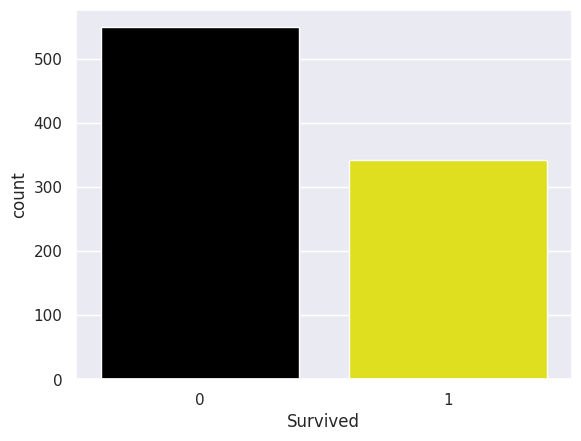

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
custom_palette = ['black', 'yellow']
sns.set_palette(custom_palette)
sns.countplot(x='Survived', data=t_data)
plt.show()


In [ ]:
titanic_data['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

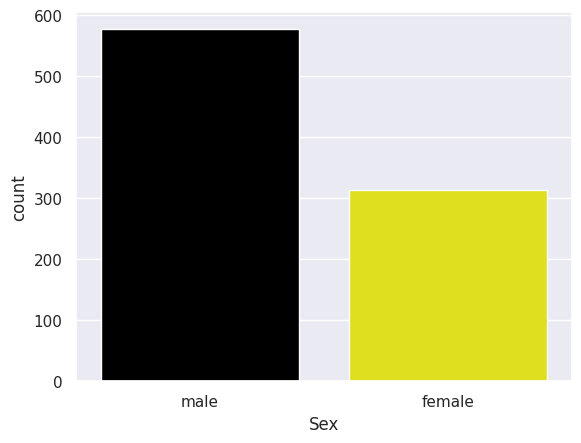

In [ ]:
sns.countplot(x='Sex', data=t_data)

<Axes: xlabel='Sex', ylabel='count'>

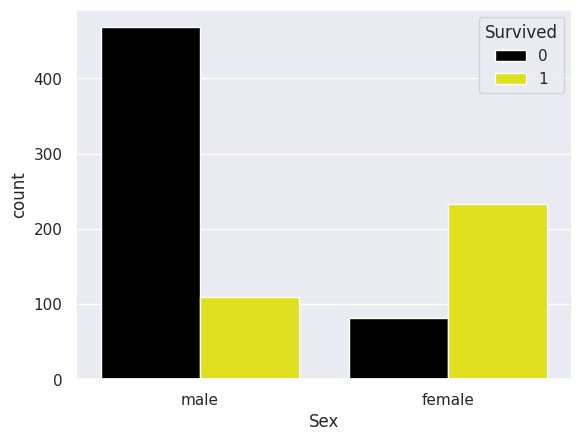

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=t_data)

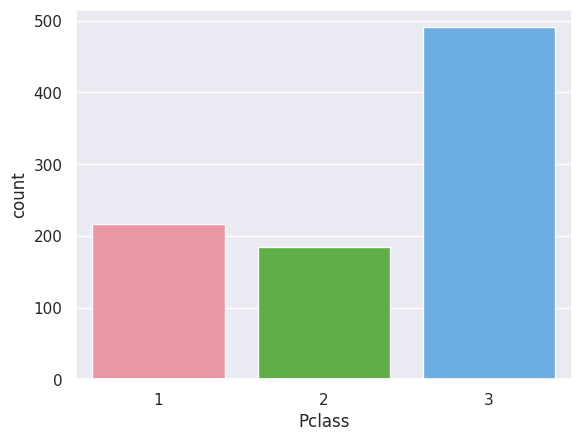

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
custom_palette = ['black', 'yellow']
sns.set_palette(custom_palette)
sns.countplot(x='Pclass', data=titanic_data)
plt.show()


<Axes: xlabel='Pclass', ylabel='count'>

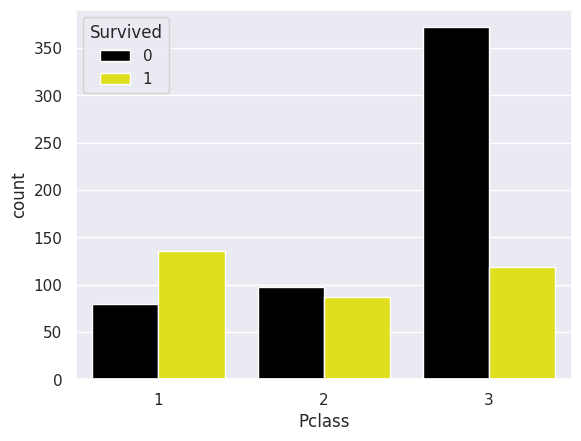

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

In [ ]:
t_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
t_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
t_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [ ]:
t_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [ ]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']
print(X)
print(Y)

     Pclass  Sex   Age  SibSp  Parch     Fare Cabin  Embarked
0         3    0  22.0      1      0   7.2500   NaN       0.0
1         1    1  38.0      1      0  71.2833   C85       1.0
2         3    1  26.0      0      0   7.9250   NaN       0.0
3         1    1  35.0      1      0  53.1000  C123       0.0
4         3    0  35.0      0      0   8.0500   NaN       0.0
..      ...  ...   ...    ...    ...      ...   ...       ...
886       2    0  27.0      0      0  13.0000   NaN       0.0
887       1    1  19.0      0      0  30.0000   B42       0.0
888       3    1   NaN      1      2  23.4500   NaN       0.0
889       1    0  26.0      0      0  30.0000  C148       1.0
890       3    0  32.0      0      0   7.7500   NaN       2.0

[891 rows x 8 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(891, 8) (712, 8) (179, 8)


In [ ]:
model = LogisticRegression()

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_transformed_imputed = imputer.fit_transform(X_train_transformed)l
model.fit(X_train_transformed_imputed, Y_train)


LogisticRegression(max_iter=1000)

In [ ]:
import numpy as np
import pandas as pd
X_train_transformed_array = X_train_transformed.toarray()
X_train_transformed_df = pd.DataFrame(X_train_transformed_array, columns=preprocessor.get_feature_names_out())
X_train_transformed_cleaned = X_train_transformed_df.dropna()
Y_train_cleaned = Y_train[X_train_transformed_df.index.isin(X_train_transformed_cleaned.index)]
model.fit(X_train_transformed_cleaned, Y_train_cleaned)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.impute import SimpleImputer
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)
X_train_transformed = preprocessor.fit_transform(X_train)
imputer = SimpleImputer(strategy='mean')
X_train_transformed_imputed = imputer.fit_transform(X_train_transformed)
X_train_prediction = model.predict(X_train_transformed_imputed)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(X_train_prediction)

[0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0
 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0
 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0
 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1
 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1
 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0
 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0
 0 1 0 1 0 0 1 0 0 1 0 1 

In [ ]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8103932584269663


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)


X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


In [ ]:
from sklearn.impute import SimpleImputer
X_test_transformed = preprocessor.transform(X_test)
X_test_transformed_imputed = imputer.fit_transform(X_test_transformed)
X_test_prediction = model.predict(X_test_transformed_imputed)
print(X_test_prediction)


[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1
 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8324022346368715
